# Homework 2

### Due: Wed Oct. 18 @ 9pm

In this homework we continue to clean some data to perform regression and classification.

This data is provided by World Bank Open Data https://data.worldbank.org/, processed as in Homework 1.

We will be performing regression with respect to GDP and classification with respect to Income Group as given.
To do that we will need to continue to clean and transform the data.


## Instructions

Follow the comments below and fill in the blanks (____) to complete.

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import sklearn
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# read in the data
df = pd.read_csv('../data/country_electricity_by_region.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
Country Code                                                        217 non-null object
Short Name                                                          217 non-null object
Region                                                              217 non-null object
Income Group                                                        217 non-null object
Access to electricity (% of population)                             214 non-null float64
GDP (constant 2010 US$)                                             193 non-null float64
Population density (people per sq. km of land area)                 215 non-null float64
Population, total                                                   216 non-null float64
Unemployment, total (% of total labor force) (national estimate)    113 non-null float64
Region_Europe & Central Asia                                        217 non-null int64
Region_Lati

In [4]:
# rename columns for ease of reference
columns = ['country_code','short_name','region','income_group','access_to_electricity','gdp','population_density',
           'population_total','unemployment','region_europe','region_latin_america_and_caribbean',
           'region_middle_east_and_north_africa','region_north_america','region_south_asia',
           'region_subsaharan_africa']

df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
country_code                           217 non-null object
short_name                             217 non-null object
region                                 217 non-null object
income_group                           217 non-null object
access_to_electricity                  214 non-null float64
gdp                                    193 non-null float64
population_density                     215 non-null float64
population_total                       216 non-null float64
unemployment                           113 non-null float64
region_europe                          217 non-null int64
region_latin_america_and_caribbean     217 non-null int64
region_middle_east_and_north_africa    217 non-null int64
region_north_america                   217 non-null int64
region_south_asia                      217 non-null int64
region_subsaharan_africa               217 non-null int64
dtypes: flo

In [5]:
# create a dummy variable 'gdp_missing' to indicate where 'gdp' is null
df['gdp_missing'] = df.gdp.isnull()

In [6]:
# assert that the number of True values in gdp_missing is the same as the number of nans in gdp
assert sum(df.gdp.isnull()) == sum(df.gdp_missing)

In [7]:
# use value_counts to find the number of countries per income_group
df.income_group.value_counts()

High income            77
Upper middle income    56
Lower middle income    53
Low income             31
Name: income_group, dtype: int64

In [8]:
# use groupby to find the number of missing gpd by income_level
df.groupby('income_group').gdp.apply(lambda x: sum(x.isnull()))

income_group
High income            18
Low income              3
Lower middle income     1
Upper middle income     2
Name: gdp, dtype: int64

In [9]:
# what is the proportion of missing gdp per income_level?
df.groupby('income_group').gdp.apply(lambda x: sum(x.isnull())) / df.income_group.value_counts()

High income            0.233766
Low income             0.096774
Lower middle income    0.018868
Upper middle income    0.035714
dtype: float64

In [10]:
# fill in missing gdp values according to income_group mean
# to do this, group by income_group and apply the fillna function, filling with the mean
# inplace is not available here, so assign back into the gdp column
df.gdp = df.groupby('income_group').gdp.apply(lambda x: x.fillna(x.mean()))

In [11]:
# assert that there are no longer any missing values in gdp
assert sum(df.gdp.isnull()) == 0

In [12]:
# create 'populiation_density_missing' and 'access_to_electricity_missing' dummy variables
df['population_density_missing'] = df.population_density.isnull()
df['access_to_electricity_missing'] = df.access_to_electricity.isnull()

In [13]:
# fill in missing population_density and access_to_electricity with median, grouping by region
df.population_density = df.groupby('region').population_density.apply(lambda x: x.fillna(x.median()))
df.access_to_electricity = df.groupby('region').access_to_electricity.apply(lambda x: x.fillna(x.median()))

In [14]:
# assert that population_density and access_to_electricity are no longer missing values
assert sum(df.population_density.isnull()) == 0
assert sum(df.access_to_electricity.isnull()) == 0

In [15]:
# create a normalized 'gdp_zscore' column
from scipy.stats import zscore
df['gdp_zscore'] = zscore(df.gdp)

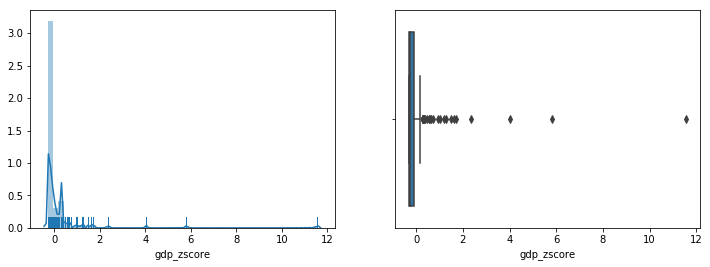

In [16]:
# use seaborn to create a distplot (with rugplot indicators) and boxplot of gdp_zscores to visualize outliers
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.gdp_zscore, rug=True, ax=ax[0])
_ = sns.boxplot(df.gdp_zscore, ax=ax[1])

In [17]:
# print the top 10 country_code and gdp_zscore sorted by gdp_zscore
df[['country_code','gdp_zscore']].sort_values(by='gdp_zscore', ascending=False)[:10]

,country_code,gdp_zscore
203,USA,11.552402
36,CHN,5.807531
98,JPN,4.035723
50,DEU,2.365951
64,FRA,1.717156
68,GBR,1.626685
26,BRA,1.479186
89,IND,1.264916
95,ITA,1.201040
32,CAN,1.007785


In [18]:
# set a zscore cutoff to remove the top 4 outliers
gdp_zscore_cutoff = 2

In [19]:
# create normalized 'population_density_zscore' column
df['population_density_zscore'] = zscore(df.population_density)

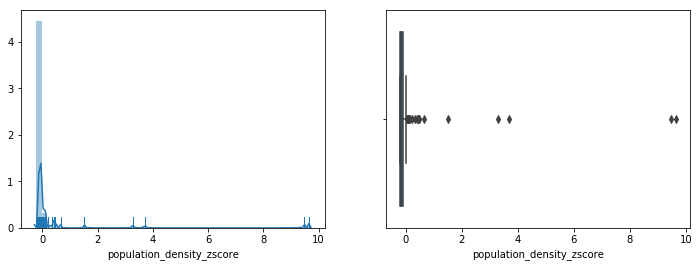

In [20]:
# use seaborn to create a distplot (with rugplot indicators) and boxplot 
# of population_density_zscore to visualize outliers
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.population_density_zscore, rug=True, ax=ax[0])
_ = sns.boxplot(df.population_density_zscore)

In [21]:
# print the top 10 country_code and population_density_zscore sorted by population_density_zscore
df[['country_code','population_density_zscore']].sort_values(by='population_density_zscore', ascending=False)[:10]

,country_code,population_density_zscore
118,MAC,9.660487
121,MCO,9.474560
170,SGP,3.703655
82,HKG,3.287870
71,GIB,1.512029
19,BHR,0.662775
124,MDV,0.461115
129,MLT,0.460529
24,BMU,0.443888
17,BGD,0.404138


In [22]:
# set a zscore cutoff to remove the top 5 outliers
population_density_zscore_cutoff = 1.5

In [23]:
# create normalized 'access_to_electricity_zscore' column
df['access_to_electricity_zscore'] = zscore(df.access_to_electricity)

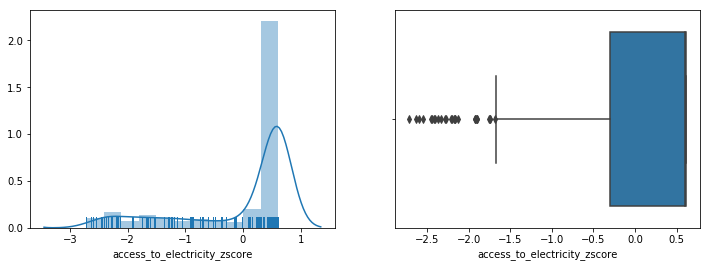

In [24]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.access_to_electricity_zscore, rug=True, ax=ax[0])
_ = sns.boxplot(df.access_to_electricity_zscore)

In [25]:
# if we were to drop rows with access_to_electricity_zscore less than -2, what proportion of the dataset would we drop?
sum(df.access_to_electricity_zscore < -2) / len(df)

0.08294930875576037

In [26]:
# drop outliers (considering both gdp_zscore and population_density_zscore)
df = df[(df.gdp_zscore < gdp_zscore_cutoff) & (df.population_density_zscore < population_density_zscore_cutoff)]

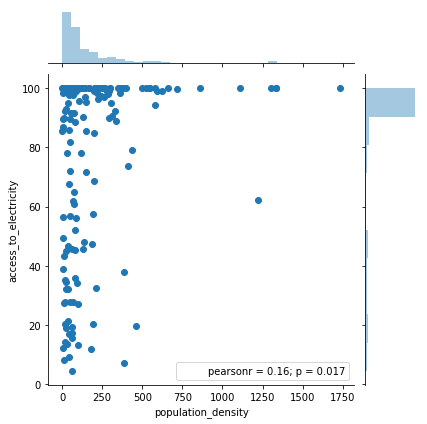

In [27]:
# use seaborn jointplot to plot the interaction between population_density and access_to_electricity
_ = sns.jointplot(x='population_density',y='access_to_electricity',data=df)

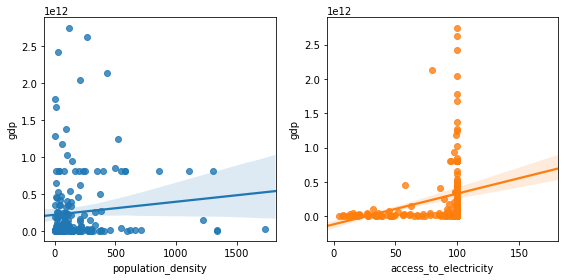

In [28]:
# use seaborn regplot to plot a simple linear regression of
# gdp predicted by population_density and
# gdp predicted by access_to_electricity
fig, ax = plt.subplots(1,2,figsize=(8,4))
_ = sns.regplot(x='population_density',y='gdp',data=df, ax=ax[0])
_ = sns.regplot(x='access_to_electricity',y='gdp',data=df, ax=ax[1])
_ = plt.tight_layout()

---

In [29]:
# create the training set of X features (population_density, access_To_electricity) 
# and label y (gdp)
X = df[['population_density','access_to_electricity']].values
y = df.gdp.values

In [46]:
df.columns

Index(['country_code', 'short_name', 'region', 'income_group',
       'access_to_electricity', 'gdp', 'population_density',
       'population_total', 'unemployment', 'region_europe',
       'region_latin_america_and_caribbean',
       'region_middle_east_and_north_africa', 'region_north_america',
       'region_south_asia', 'region_subsaharan_africa', 'gdp_missing',
       'population_density_missing', 'access_to_electricity_missing',
       'gdp_zscore', 'population_density_zscore',
       'access_to_electricity_zscore'],
      dtype='object')

In [48]:
df.to_csv('../data/country_electricity_by_region_edited.csv', index=False)

In [30]:
# import and initialize a LinearRegression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
# train the regressor on X and y
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# print out the learned intercept and coefficients
print(lr.intercept_)
print(lr.coef_[0])
print(lr.coef_[1])

-124604569392.0
93939617.2664
4350303654.66


In [33]:
country_mask = (df.country_code == 'CAN').values

In [34]:
# how far off is our model's prediction for Canada's (country_code CAN) gdp from it's actual gdp?
lr.predict(X[country_mask,:]) - y[country_mask]

array([ -1.46881822e+12])

In [35]:
# instantiate, train and print the learned parameters, 
# this time forcing the intercept to 0 (fit_intercept=False)
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)

print(lr.intercept_)
print(lr.coef_[0])
print(lr.coef_[1])

0.0
81683338.4704
3020599784.18


In [36]:
# did the prediction for CAN improve?
lr.predict(X[country_mask,:]) - y[country_mask]

array([ -1.47723195e+12])

In [37]:
# create a new training set X that, in addition to population_density and access_to_electricity,
# also includes the region_* dummies
X = df[['population_density','access_to_electricity','region_europe','region_latin_america_and_caribbean',
           'region_middle_east_and_north_africa','region_north_america','region_south_asia',
           'region_subsaharan_africa']].values

In [38]:
# instantiate a new model and train
# with the new dataset, does it make sense for the intercept to be 0?
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# did the prediction for CAN improve?
lr.predict(X[country_mask,:]) - y[country_mask]

array([ -5.30273394e+11])

---

In [40]:
# set our y labels to now be income_group categorical values
y = df.income_group.values

In [41]:
# import and instantiate a K Nearest Neighbor classifier
# using 3 neighbors and a euclidean distance metric
# train on X,y
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
# does the predicted income_group for CAN match the true value?
df.income_group[country_mask] == knn.predict(X[country_mask,:])

32    True
Name: income_group, dtype: bool

In [43]:
# import and instantiate a RandomForest classifier
# using 20 trees and a max_depth of 3
# train on X,y
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=3)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
# does the predicted income_group for CAN match the true value?
df.income_group[country_mask] == rf.predict(X[country_mask,:])

32    True
Name: income_group, dtype: bool